# Handwritten Digit Classification using MNIST

This notebook demonstrates the classification of handwritten digits using the MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images of handwritten digits (0-9). We will preprocess the data, build a machine learning model, and evaluate its performance.

## Steps:
1. Load and visualize the MNIST dataset.
2. Preprocess the data for training.
3. Train a classification model (e.g., neural network, SVM, or CNN).
4. Evaluate the model's accuracy on test data.
5. Visualize predictions and misclassifications.

Let's get started!


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# **Pytorch**

In [20]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

def data_loader ():
    print('loading data...')
    train_set = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)
    test_set = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set,batch_size=100,shuffle=False)
    print(f'train_set size : {train_set.data.size()}')
    print(f'test_set size : {test_set.data.size()}')
    return train_loader , test_loader

def show_data (train_loader , num_to_show):
  print('showing data...')
  images, labels = next(iter(train_loader))
  fig, axes = plt.subplots(2, int(num_to_show/2), figsize = (12, 5))
  for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

#Train
def train_model (model,train_loader,criterion,optimizer,epochs):
  print(f'training  model...')
  loss_list = []
  acc_list = []
  for epoch in range(epochs):
    running_loss = 0
    for i , data in enumerate(train_loader):
      inputs,labels = data
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      if i % 100 == 99:
          print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
          running_loss = 0.0
  print('Finished Training')


def model_evaluation (model,test_loader):
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

In [21]:
class SimpleNN(nn.Module):
    def __init__(self):
      super(SimpleNN,self).__init__()
      self.fc1 = nn.Linear(28*28 , 128)
      self.fc2 = nn.Linear(128,10)

    def forward (self,x):
      x = x.view(-1,28*28)
      x = torch.relu(self.fc1(x))
      x = self.fc2(x)
      return x

model_ANN = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ANN.parameters(),lr=0.001)

In [22]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN,self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='same')
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same')
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding='same')
    self.fc1 = nn.Linear(128 * 3 * 3, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)
    self.pool = nn.MaxPool2d(2, 2)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


derived_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(derived_model.parameters(), lr=0.001)

In [23]:
Model_List = [model_ANN , derived_model]
epochs = [5,10]

In [24]:
def main (Model_List , epochs):
  train_loader , test_loader = data_loader()
  show_data(train_loader,20)
  for  i ,model in enumerate(Model_List) :
    history = train_model(model,train_loader,criterion,optimizer,epochs=epochs[i])
    model_evaluation(model,test_loader)

loading data...
train_set size : torch.Size([60000, 28, 28])
test_set size : torch.Size([10000, 28, 28])
showing data...


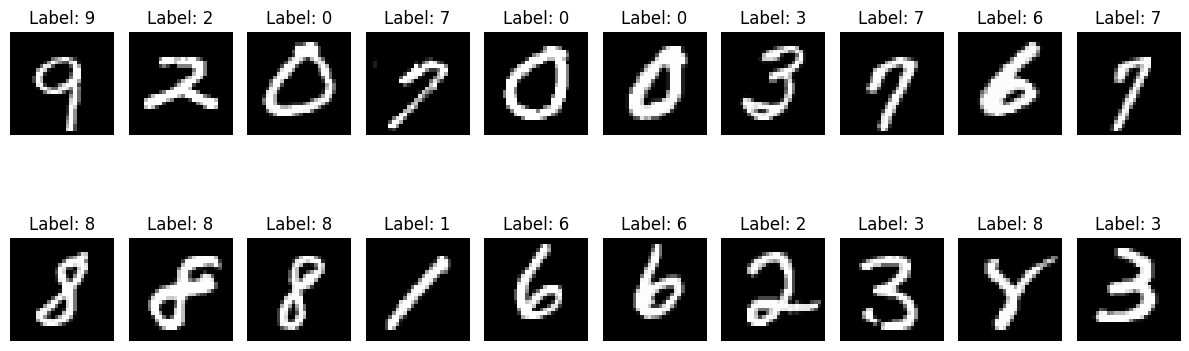

training  model...
[1, 100] loss: 2.327
[1, 200] loss: 2.326
[1, 300] loss: 2.326
[1, 400] loss: 2.331
[1, 500] loss: 2.327
[1, 600] loss: 2.334
[2, 100] loss: 2.329
[2, 200] loss: 2.331
[2, 300] loss: 2.327
[2, 400] loss: 2.329
[2, 500] loss: 2.325
[2, 600] loss: 2.329
[3, 100] loss: 2.329
[3, 200] loss: 2.331
[3, 300] loss: 2.327
[3, 400] loss: 2.331
[3, 500] loss: 2.328
[3, 600] loss: 2.326
[4, 100] loss: 2.329
[4, 200] loss: 2.323
[4, 300] loss: 2.333
[4, 400] loss: 2.323
[4, 500] loss: 2.329
[4, 600] loss: 2.334
[5, 100] loss: 2.330
[5, 200] loss: 2.330
[5, 300] loss: 2.326
[5, 400] loss: 2.327
[5, 500] loss: 2.328
[5, 600] loss: 2.330
Finished Training
Accuracy of the network on the test images: 11.38%
training  model...
[1, 100] loss: 0.862
[1, 200] loss: 0.181
[1, 300] loss: 0.120
[1, 400] loss: 0.097
[1, 500] loss: 0.086
[1, 600] loss: 0.077
[2, 100] loss: 0.058
[2, 200] loss: 0.060
[2, 300] loss: 0.060
[2, 400] loss: 0.056
[2, 500] loss: 0.049
[2, 600] loss: 0.053
[3, 100] lo

In [25]:
main(Model_List , epochs)

# **Keras**

In [26]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

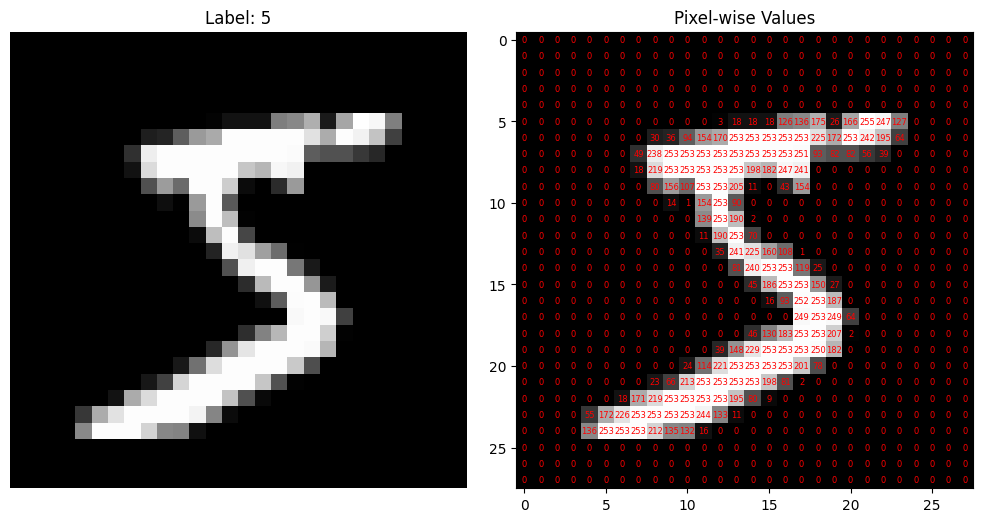

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(train_images[0].squeeze(), cmap='gray')
ax1.set_title(f'Label: {train_labels[0]}')
ax1.axis('off')

ax2.imshow(train_images[0].squeeze(), cmap='gray')
for (j, k), value in np.ndenumerate(train_images[0].squeeze()):
    ax2.text(k, j, int(value * 255), ha='center', va='center', fontsize=6, color='red')
ax2.set_title('Pixel-wise Values')
plt.tight_layout()
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(f'Validation accuracy: {val_acc}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8709 - loss: 0.3941 - val_accuracy: 0.9828 - val_loss: 0.0553
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0616 - val_accuracy: 0.9894 - val_loss: 0.0386
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0421 - val_accuracy: 0.9894 - val_loss: 0.0372
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0497
Validation accuracy: 0.9894000291824341


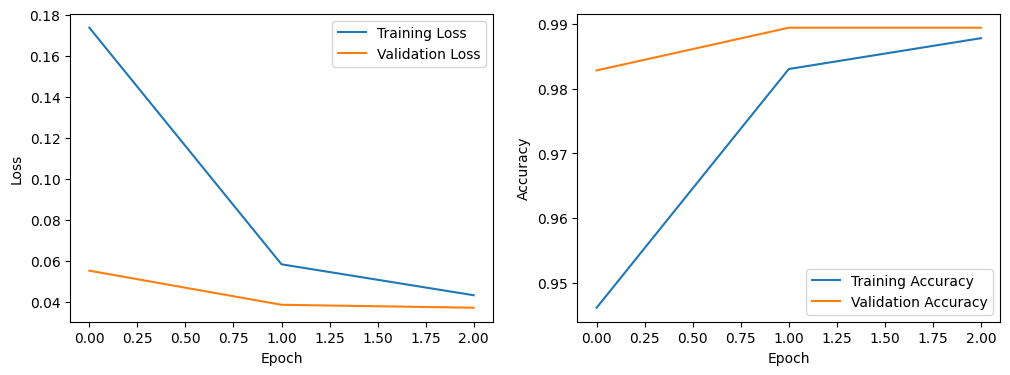

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()